In [1]:
import os, sys, glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
from lightning.pytorch import LightningDataModule
import torch
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import v2

if os.path.basename(os.getcwd()) == 'notebooks':
    sys.path.append('..')
    os.chdir('..')

import dataset

/myhome/micromamba/envs/oadatldm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class OADATDataModule(LightningDataModule):
    def __init__(self, data_path, batch_size=32, num_workers=4):
        super().__init__()
        self.data_path = data_path
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.transforms = v2.Compose([
            v2.Lambda(lambda x: np.clip(x / np.max(x), a_min=-0.2, a_max=None)),
            v2.Lambda(lambda x: (x - x.min()) / (x.max() - x.min())),
        ])

    def prepare_data(self):
        # Download or prepare the dataset if necessary
        pass

    def setup(self, stage=None):
        print("setup datamodule...")
        indices = np.load('/mydata/dlbirhoui/chia/oadat-ldm/training_sc_BP_indices.npy')
        self.train_indices = indices[:int(len(indices)*0.8)]
        self.val_indices = indices[int(len(indices)*0.8):]

        # Load data, create datasets
        self.train_obj = dataset.Dataset(
            fname_h5=os.path.join(self.data_path, 'SWFD_semicircle_RawBP.h5'),
            key='sc_BP',
            transforms=self.transforms,
            inds=self.train_indices
        )

        self.val_obj = dataset.Dataset(
            fname_h5=os.path.join(self.data_path, 'SWFD_semicircle_RawBP.h5'),
            key='sc_BP',
            transforms=self.transforms,
            inds=self.val_indices
        )

    def train_dataloader(self):
        return DataLoader(self.train_obj, batch_size=self.batch_size, shuffle=True, num_workers=self.num_workers)

    def val_dataloader(self):
        return DataLoader(self.val_obj, batch_size=self.batch_size, shuffle=False, num_workers=self.num_workers)

datamodule = OADATDataModule(data_path='/mydata/dlbirhoui/firat/OADAT')

In [3]:
# # Setup the datamodule (prepares the dataset split)
datamodule.setup()

setup datamodule...


ERROR: Unexpected bus error encountered in worker. This might be caused by insufficient shared memory (shm).
 

<class 'torch.Tensor'>
Sampled image shape: torch.Size([1, 256, 256])


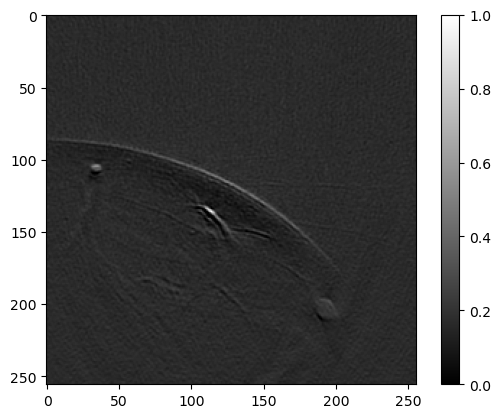

In [6]:
# Get a batch of images from the validation dataloader
val_dataloader = datamodule.val_dataloader()

# Get the first batch from the validation dataloader
sample_batch = next(iter(val_dataloader))

# Access the first image in the batch
sample_image = sample_batch[0]

# Print the shape or display the image
print(type(sample_image))
print(f"Sampled image shape: {sample_image.shape}")

# If you want to visualize the image (assuming grayscale):
import matplotlib.pyplot as plt
plt.imshow(sample_image[0], cmap='gray')
plt.colorbar()
plt.show()